In [92]:
!pip install missingno


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.metrics import classification_report


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')



In [94]:
df = pd.read_csv("heart_disease.csv")

In [96]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [100]:
categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical columns:", categorical_columns)

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Categorical columns: Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')
Gender: ['Male' 'Female' nan]
Exercise Habits: ['High' 'Low' 'Medium' nan]
Smoking: ['Yes' 'No' nan]
Family Heart Disease: ['Yes' 'No' nan]
Diabetes: ['No' 'Yes' nan]
High Blood Pressure: ['Yes' 'No' nan]
Low HDL Cholesterol: ['Yes' 'No' nan]
High LDL Cholesterol: ['No' 'Yes' nan]
Alcohol Consumption: ['High' 'Medium' 'Low' nan]
Stress Level: ['Medium' 'High' 'Low' nan]
Sugar Consumption: ['Medium' 'Low' 'High' nan]
Heart Disease Status: ['No' 'Yes']


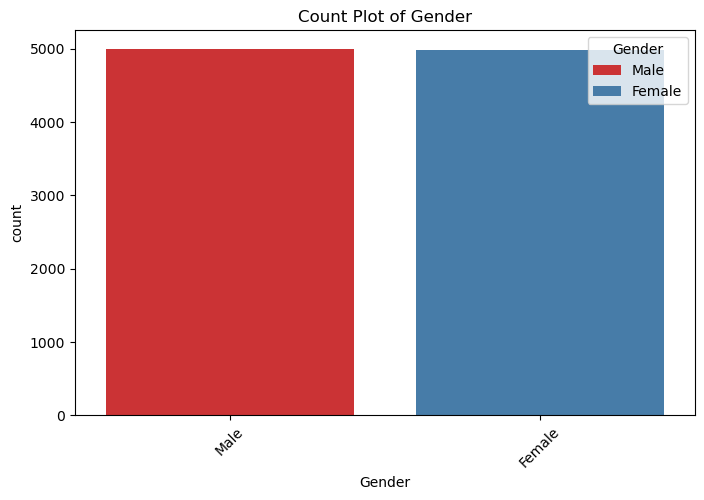

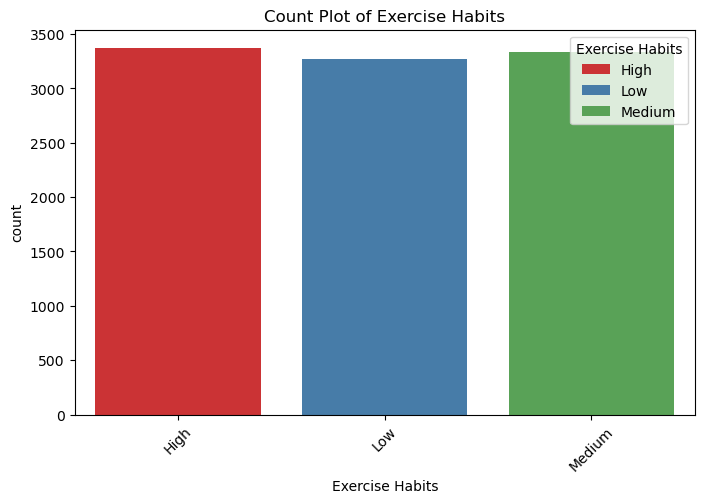

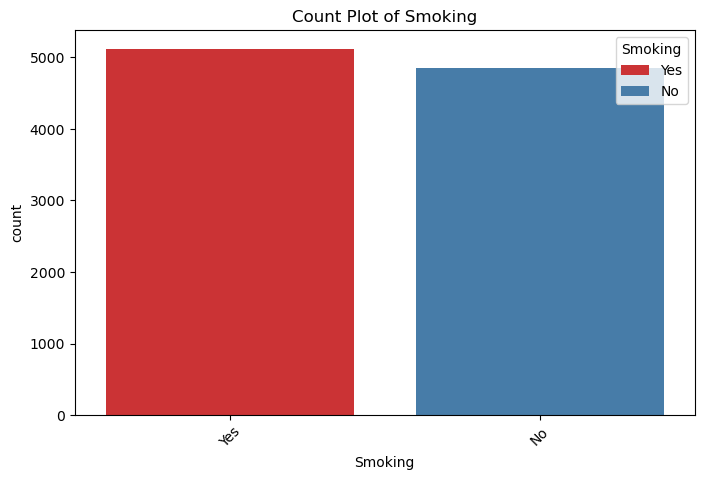

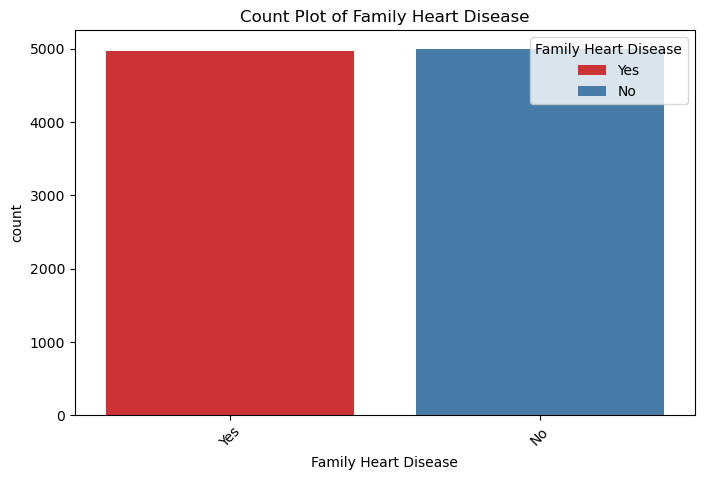

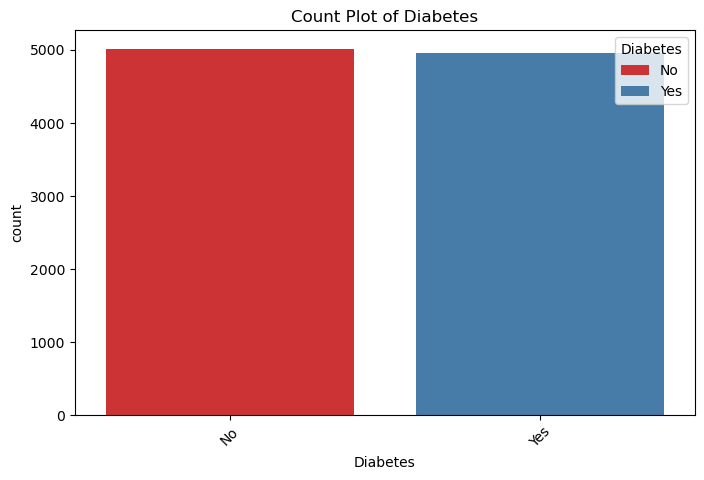

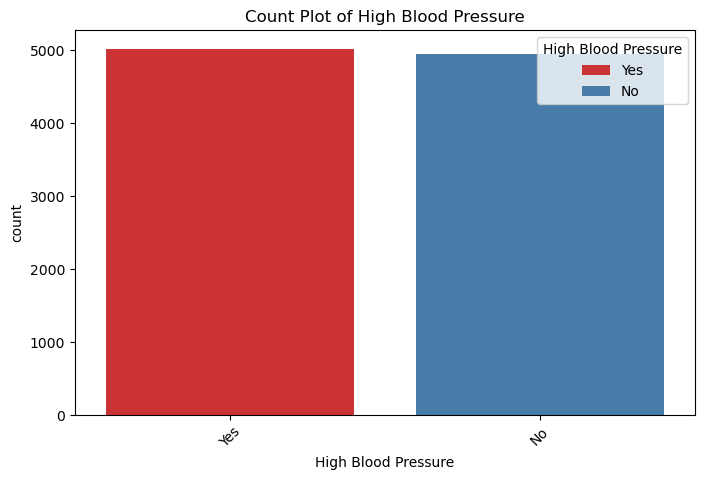

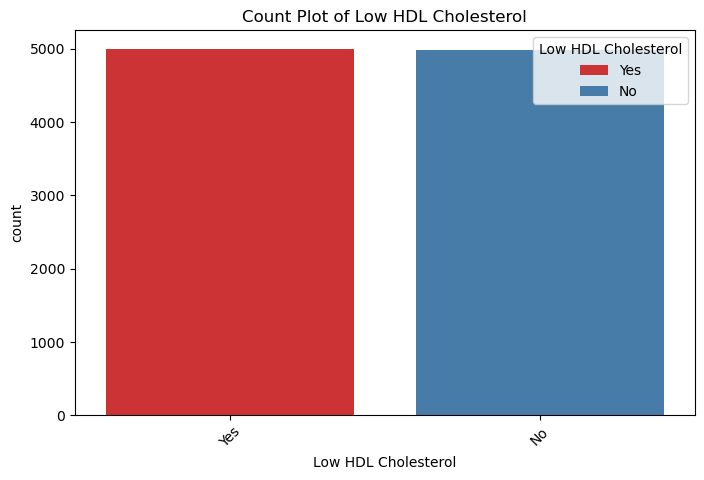

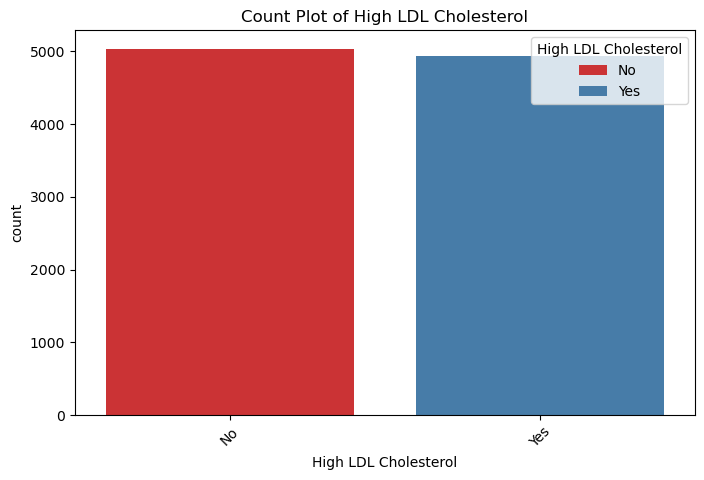

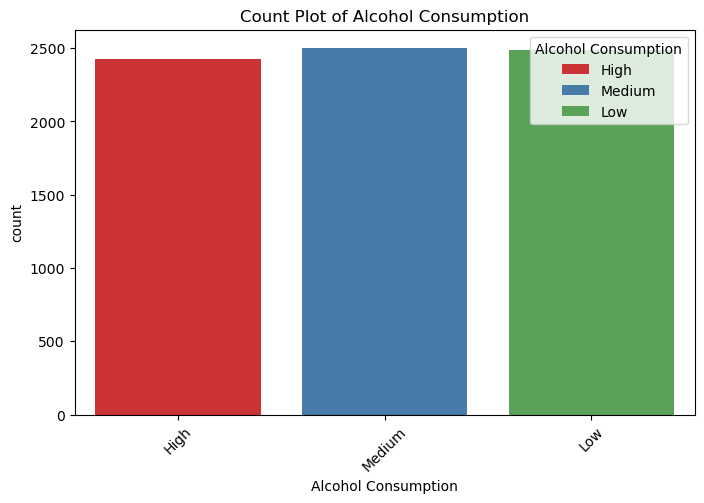

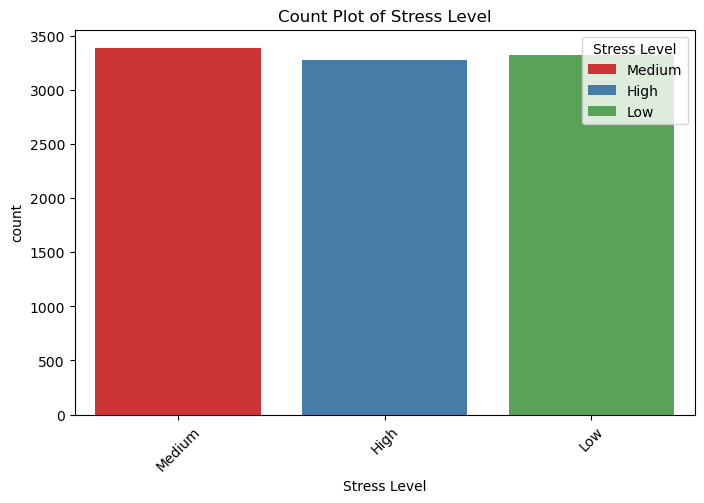

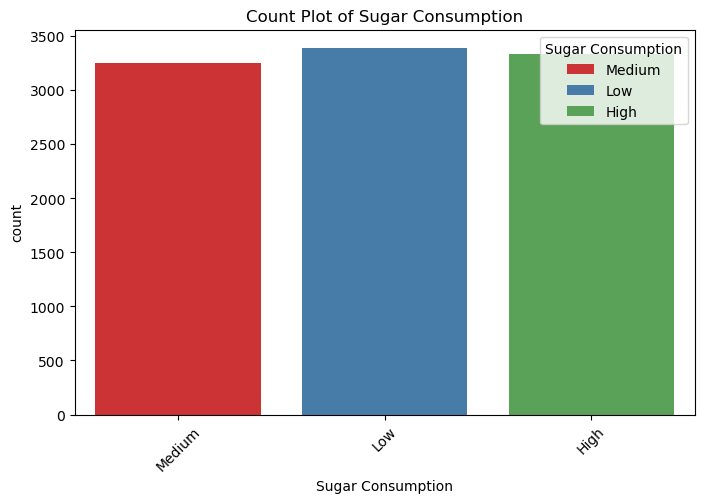

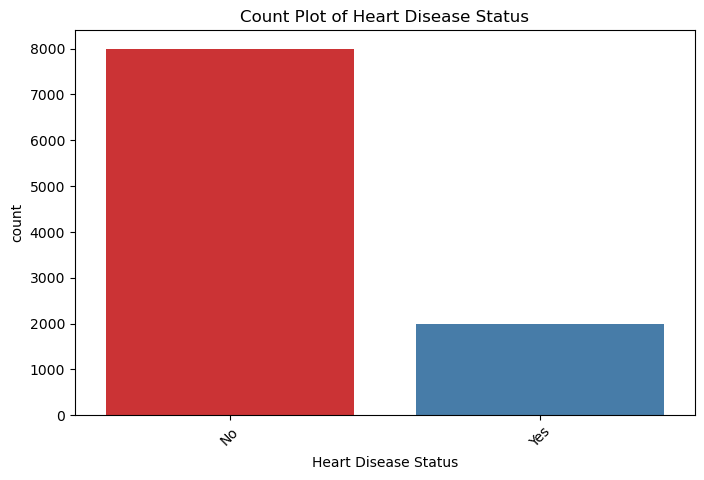

In [102]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue=col, palette='Set1', dodge=False)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

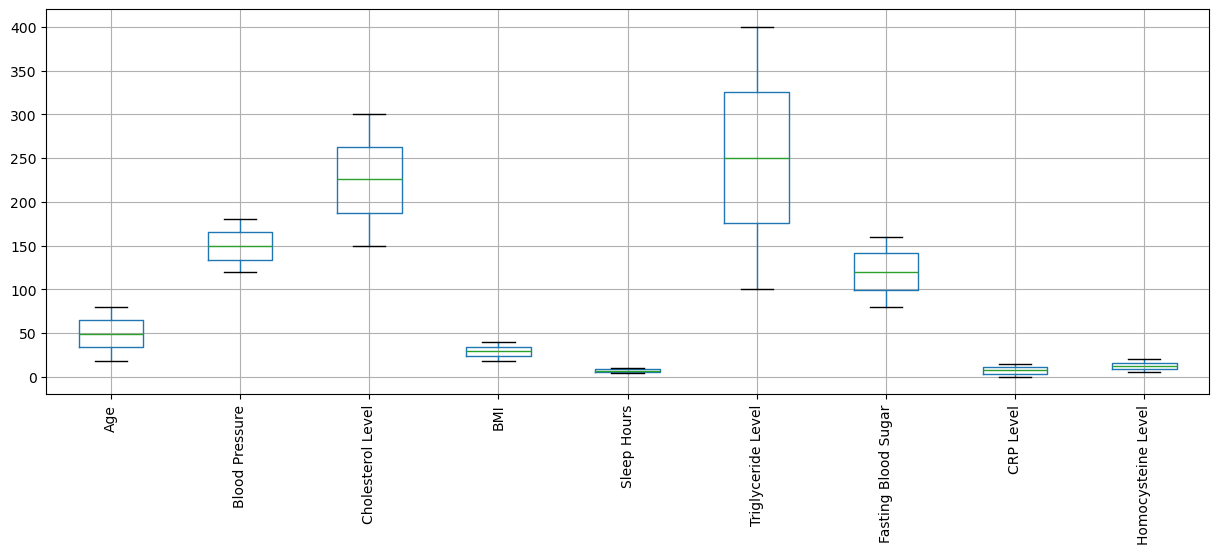

In [104]:
num_cols = df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15, 5))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
label_mappings = {}

for col in categorical_cols:
    mask = df[col].notna()

    df.loc[mask, col] = encoder.fit_transform(df.loc[mask, col])

    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Data info:")
print(df.info())

# Display label mappings
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Con

In [108]:
print(f"Missing values count is: {df.isnull().sum().sum()}")
print(f"Diplicated values count is: {df.duplicated().sum()}")

Missing values count is: 3054
Diplicated values count is: 0


In [110]:
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed)
df = df_imputed

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0     1.0           153.0              155.0              0.0   
1     69.0     0.0           146.0              286.0              0.0   
2     46.0     1.0           126.0              216.0              1.0   
3     32.0     0.0           122.0              293.0              0.0   
4     60.0     1.0           166.0              242.0              1.0   
...    ...     ...             ...                ...              ...   
9995  25.0     0.0           136.0              243.0              2.0   
9996  38.0     1.0           172.0              154.0              2.0   
9997  73.0     1.0           152.0              201.0              0.0   
9998  23.0     1.0           142.0              299.0              1.0   
9999  38.0     0.0           128.0              193.0              2.0   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0         1.0                 

In [112]:
print("missing values checking: " + str(df.isna().sum().sum()))

missing values checking: 0


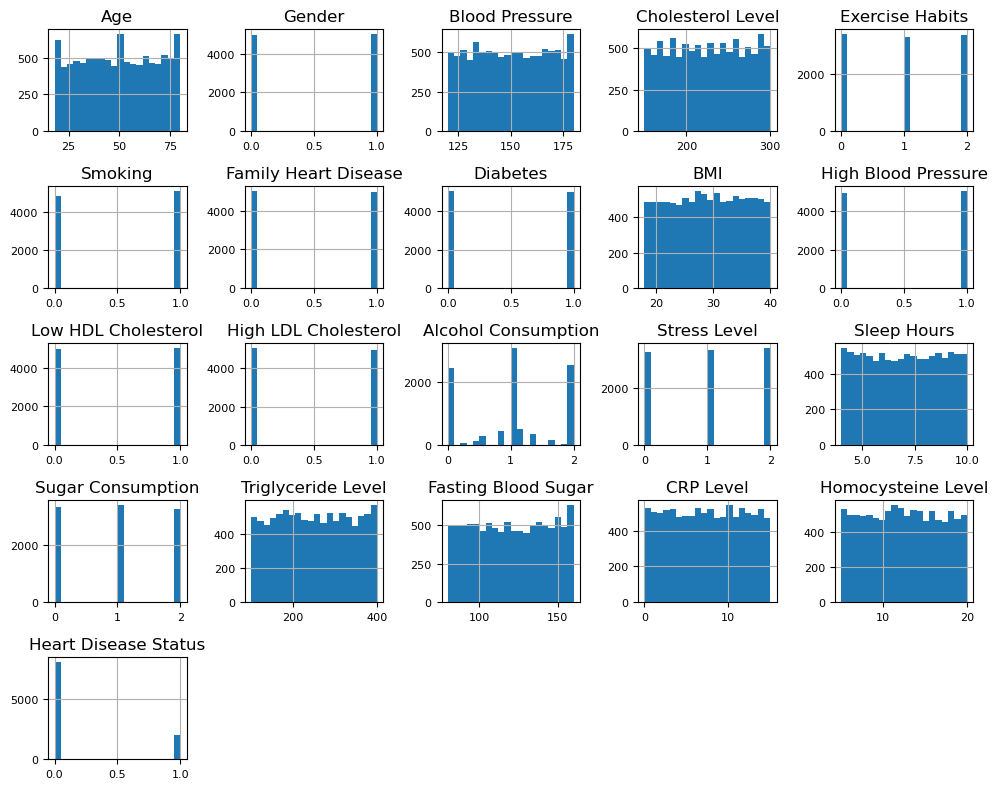

In [114]:
df.hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

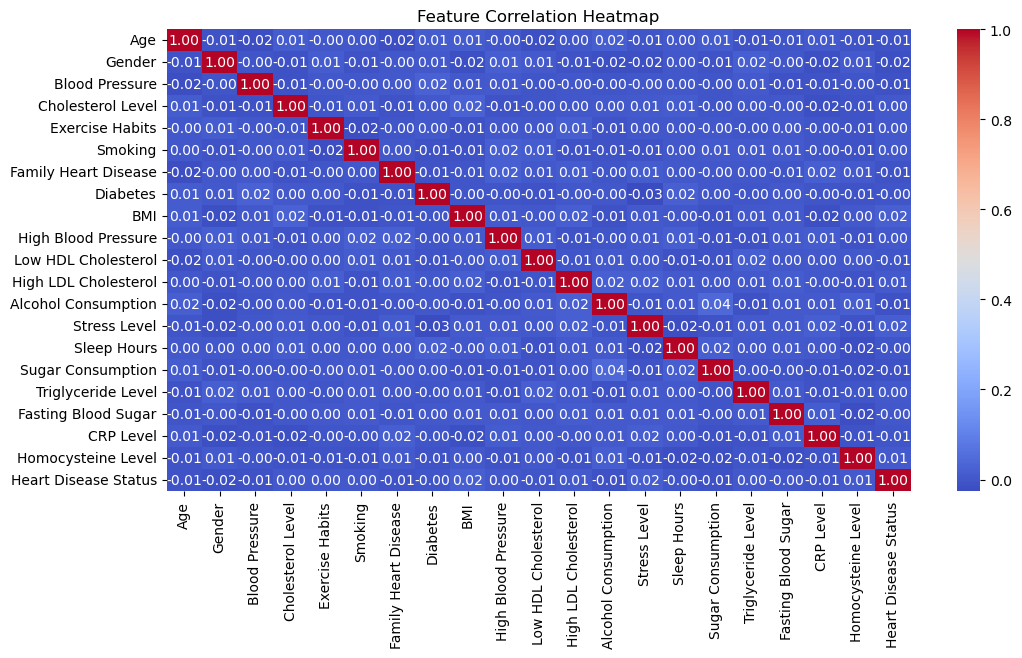

In [116]:
corr_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [118]:
scaler = MinMaxScaler()

Grade_column = df['Heart Disease Status']
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

df['Heart Disease Status'] = Grade_column

df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.612903,1.0,0.550000,0.033333,0.0,1.0,1.0,0.0,0.317756,1.0,...,0.0,0.0,1.0,0.605503,1.0,0.806667,0.5100,0.864751,0.492507,0.0
1,0.822581,0.0,0.433333,0.906667,0.0,0.0,1.0,1.0,0.328222,0.0,...,0.0,1.0,0.0,0.790657,1.0,0.110000,0.9625,0.623722,0.953319,0.0
2,0.451613,1.0,0.100000,0.440000,0.5,0.0,0.0,0.0,0.538899,0.0,...,1.0,0.5,0.5,0.073314,0.5,0.976667,0.1500,0.847452,0.415412,0.0
3,0.225806,0.0,0.033333,0.953333,0.0,1.0,1.0,0.0,0.278604,1.0,...,1.0,0.5,0.0,0.208156,0.0,0.643333,0.1750,0.834058,0.064120,0.0
4,0.677419,1.0,0.766667,0.613333,0.5,1.0,1.0,1.0,0.112914,1.0,...,0.0,0.5,0.0,0.505116,0.0,0.543333,0.9250,0.692144,0.210260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.112903,0.0,0.266667,0.620000,1.0,1.0,0.0,0.0,0.035735,1.0,...,1.0,1.0,0.0,0.472443,1.0,0.810000,0.6625,0.239116,0.942193,1.0
9996,0.322581,1.0,0.866667,0.026667,1.0,0.0,0.0,0.0,0.629894,1.0,...,1.0,0.5,0.0,0.707940,0.5,0.923333,0.0375,0.177052,0.314390,1.0
9997,0.887097,1.0,0.533333,0.340000,0.0,1.0,0.0,1.0,0.404521,0.0,...,1.0,0.2,0.5,0.072701,0.5,0.493333,0.1000,0.293810,0.299503,1.0
9998,0.080645,1.0,0.366667,0.993333,0.5,1.0,0.0,1.0,0.771169,1.0,...,1.0,1.0,0.0,0.754369,1.0,0.043333,0.9125,0.481010,0.458253,1.0


Heart Disease Status
0.0    8000
1.0    2000
Name: count, dtype: int64


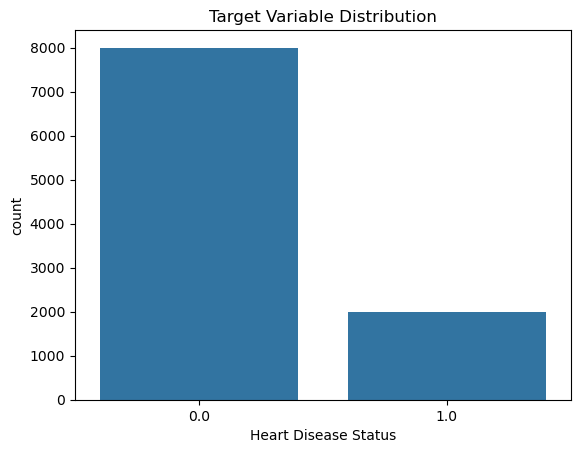

In [120]:
print(df["Heart Disease Status"].value_counts())

sns.countplot(x=df["Heart Disease Status"])
plt.title("Target Variable Distribution")
plt.show()

In [122]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [125]:
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}



rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8071875000000001


In [127]:
param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}


lr = LogisticRegression(max_iter=3000, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Accuracy:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Accuracy: 0.6648958333333332


In [129]:
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Accuracy:", grid_search_knn.best_score_)

Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.7220833333333333


In [131]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    "C": [0.1, 1, 10],  # Reduced range for speed
    "kernel": ["linear", "rbf"]  # Removed "poly" for faster execution
}

svm = SVC(random_state=42, max_iter=1000)  # Added max_iter to prevent infinite training
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)  # Added verbose

grid_search_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.6095833333333333


In [133]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naïve Bayes Accuracy:", accuracy_nb)

Naïve Bayes Accuracy: 0.67375


In [135]:
param_grid_dt = {
    "max_depth": [5, 10, 20],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy:", grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10}
Best Accuracy: 0.7339583333333334


In [137]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def cross_validate_model(model, x_train, y_train, cv=5):
    scoring = {
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted', zero_division=0),
        'f1_score': make_scorer(f1_score, average='weighted', zero_division=0)
    }

    cv_results = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)

    print(f"Cross-Validation Results for {model.__class__.__name__}:\n")
    print(f"Average Precision: {cv_results['test_precision'].mean():.4f}")
    print(f"Average Recall: {cv_results['test_recall'].mean():.4f}")
    print(f"Average F1-Score: {cv_results['test_f1_score'].mean():.4f}")
    print("="*50, "\n")

models = {
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, class_weight="balanced"),
    "SVM": SVC(C=10, kernel='rbf', class_weight="balanced"),
    "Logistic Regression": LogisticRegression(C=0.1, solver='lbfgs', class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=3, weights='distance'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight="balanced"),
}

for name, model in models.items():
    print(f"Cross-Validating {name}...")
    cross_validate_model(model, X_train, y_train, cv=5)

Cross-Validating Random Forest...
Cross-Validation Results for RandomForestClassifier:

Average Precision: 0.8437
Average Recall: 0.8096
Average F1-Score: 0.7857

Cross-Validating SVM...
Cross-Validation Results for SVC:

Average Precision: 0.7528
Average Recall: 0.7323
Average F1-Score: 0.7380

Cross-Validating Logistic Regression...
Cross-Validation Results for LogisticRegression:

Average Precision: 0.5561
Average Recall: 0.5055
Average F1-Score: 0.5192

Cross-Validating KNN...
Cross-Validation Results for KNeighborsClassifier:

Average Precision: 0.7642
Average Recall: 0.7221
Average F1-Score: 0.7297

Cross-Validating Naive Bayes...
Cross-Validation Results for GaussianNB:

Average Precision: 0.4421
Average Recall: 0.6649
Average F1-Score: 0.5311

Cross-Validating Decision Tree...
Cross-Validation Results for DecisionTreeClassifier:

Average Precision: 0.6483
Average Recall: 0.6383
Average F1-Score: 0.6354



In [139]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    report = classification_report(y_test, y_pred, zero_division=1)  # Get precision, recall, f1-score
    print(f"Evaluation for {model.__class__.__name__}:\n")
    print(report)
    print("="*50, "\n")

# Define models
models = {
    "Random Forest": RandomForestClassifier(max_depth= 20, min_samples_split= 2, n_estimators= 200, class_weight="balanced"),
    "SVM": SVC(C= 10, kernel= 'rbf',class_weight="balanced"),
    "Logistic Regression": LogisticRegression(C= 0.1, solver= 'lbfgs', class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors= 3, weights= 'distance'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, class_weight="balanced"),
}

# Run evaluation for each model
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)

Evaluation for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1617
         1.0       0.98      0.51      0.67       783

    accuracy                           0.84      2400
   macro avg       0.89      0.75      0.78      2400
weighted avg       0.86      0.84      0.82      2400


Evaluation for SVC:

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81      1617
         1.0       0.60      0.78      0.68       783

    accuracy                           0.76      2400
   macro avg       0.74      0.76      0.74      2400
weighted avg       0.79      0.76      0.77      2400


Evaluation for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.70      0.53      0.60      1617
         1.0       0.35      0.52      0.42       783

    accuracy                           0.53      2400
   macro avg       0.52      

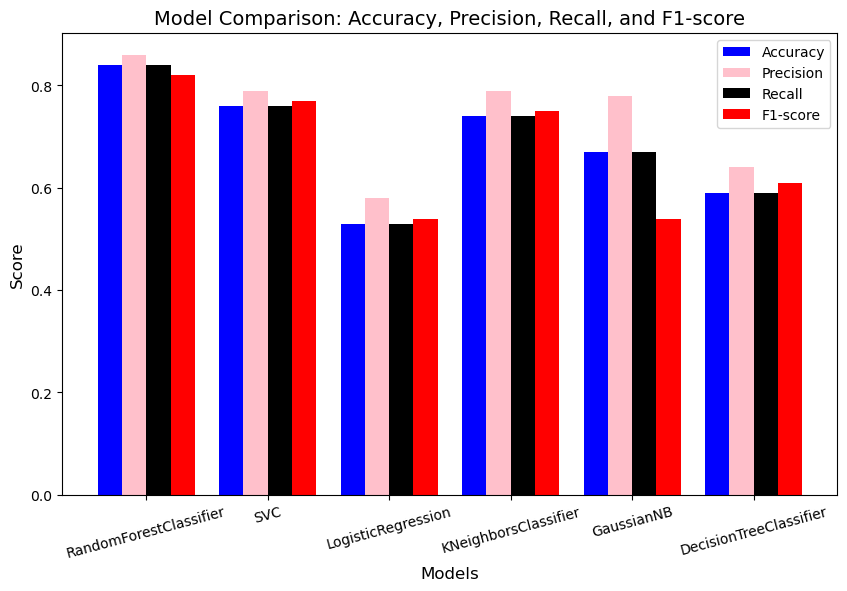

In [143]:
models_compair = [
    "RandomForestClassifier",
    "SVC",
    "LogisticRegression",
    "KNeighborsClassifier",
    "GaussianNB",
    "DecisionTreeClassifier"
]

# Performance metrics (extracted from provided evaluations)
accuracy = [0.84, 0.76, 0.53, 0.74, 0.67, 0.59]
precision = [0.86, 0.79, 0.58, 0.79, 0.78, 0.64]
recall = [0.84, 0.76, 0.53, 0.74, 0.67, 0.59]
f1_score = [0.82, 0.77, 0.54, 0.75, 0.54, 0.61]

# Bar width
bar_width = 0.2
x = np.arange(len(models_compair))

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5 * bar_width, accuracy, bar_width, label="Accuracy", color="blue")
ax.bar(x - 0.5 * bar_width, precision, bar_width, label="Precision", color="pink")
ax.bar(x + 0.5 * bar_width, recall, bar_width, label="Recall", color="black")
ax.bar(x + 1.5 * bar_width, f1_score, bar_width, label="F1-score", color="red")

# Labels and title
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Model Comparison: Accuracy, Precision, Recall, and F1-score", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models_compair, rotation=15)
ax.legend()

# Show the chart
plt.show()

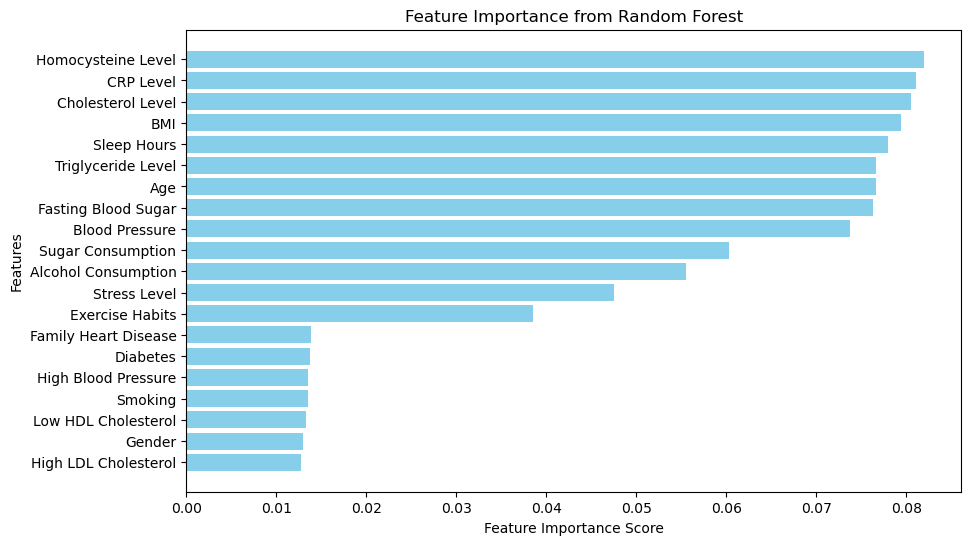

                Feature  Importance
19   Homocysteine Level    0.082007
18            CRP Level    0.081089
3     Cholesterol Level    0.080531
8                   BMI    0.079377
14          Sleep Hours    0.077941
16   Triglyceride Level    0.076629
0                   Age    0.076628
17  Fasting Blood Sugar    0.076314
2        Blood Pressure    0.073756
15    Sugar Consumption    0.060345


In [145]:
feature_importances = models["Random Forest"].feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.show()

print(importance_df.head(10))

Confusion Matrix:
 [[1607   10]
 [ 397  386]]


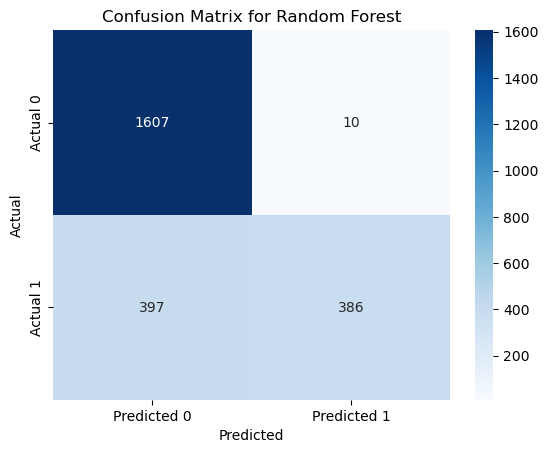

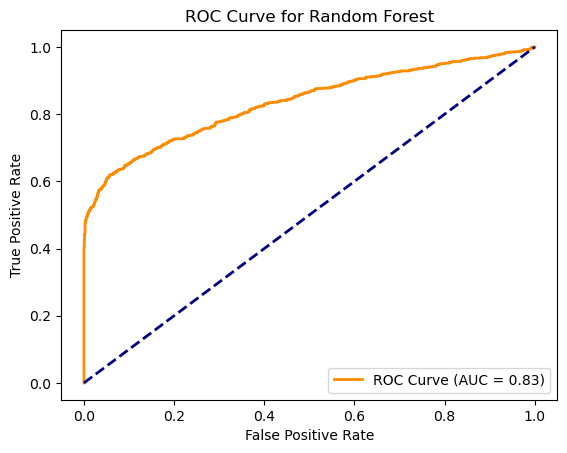

In [147]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

rf_model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import joblib
# first try to do app
# Save model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save any transformer (e.g., scaler, encoder if used)
joblib.dump(scaler, 'scaler.pkl')  # if you used a scaler
# joblib.dump(encoder, 'encoder.pkl')  # if used

['scaler.pkl']

In [11]:
print(df_encoded.columns.tolist())
['age', 'sex', ..., 'Heart Disease Status_Yes']
target_col = 'Heart Disease Status_Yes'  
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]


['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level', 'Gender_Female', 'Gender_Male', 'Exercise Habits_High', 'Exercise Habits_Low', 'Exercise Habits_Medium', 'Smoking_No', 'Smoking_Yes', 'Family Heart Disease_No', 'Family Heart Disease_Yes', 'Diabetes_No', 'Diabetes_Yes', 'High Blood Pressure_No', 'High Blood Pressure_Yes', 'Low HDL Cholesterol_No', 'Low HDL Cholesterol_Yes', 'High LDL Cholesterol_No', 'High LDL Cholesterol_Yes', 'Alcohol Consumption_High', 'Alcohol Consumption_Low', 'Alcohol Consumption_Medium', 'Stress Level_High', 'Stress Level_Low', 'Stress Level_Medium', 'Sugar Consumption_High', 'Sugar Consumption_Low', 'Sugar Consumption_Medium', 'Heart Disease Status_No', 'Heart Disease Status_Yes']


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import joblib
#after the challenge I faced,the  try some steps to do app agian 
# Step 1: Load  dataset
df = pd.read_csv("heart_disease.csv")  

# Step 2: Encode categorical variables
df_encoded = pd.get_dummies(df)

# Step 3: Split features and target
target_col = 'Heart Disease Status_Yes'  # or the exact name shown
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]
# Step 4: Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

# Step 6: Save the trained model and scaler
joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")
# Save the feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
feature_names = joblib.load("feature_names.pkl")